In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
import phik
import graphviz
import lightgbm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from phik.report import plot_correlation_matrix



sb.set()

In [2]:
churndata = pd.read_csv('churn_model.csv')
churndata.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
churndata['Area code'] = churndata['Area code'].astype('object')
print(churndata.dtypes)

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [4]:
churn_num_data = churndata.select_dtypes(exclude=[object])

In [5]:
print(churn_num_data.dtypes)

Account length              int64
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [6]:
churn_cat_data = churndata.select_dtypes(include=[object,bool])

In [7]:
print(churn_cat_data.dtypes)

State                 object
Area code             object
International plan    object
Voice mail plan       object
Churn                   bool
dtype: object


In [8]:
churn_num_data.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
churn_num_corr = churn_num_data.iloc[:,:16].corrwith(churn_num_data['Churn'].astype('float'),method=stats.pointbiserialr)

In [10]:
print(churn_num_corr)

   Account length  Number vmail messages  Total day minutes  Total day calls  \
0        0.017728              -0.086474       1.956879e-01         0.018290   
1        0.360192               0.000008       2.023431e-24         0.345156   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0      1.956889e-01           0.072906        -0.001539          0.072893   
1      2.022321e-24           0.000165         0.936687          0.000165   

   Total night minutes  Total night calls  Total night charge  \
0             0.033639           0.012262            0.033635   
1             0.082462           0.526830            0.082496   

   Total intl minutes  Total intl calls  Total intl charge  \
0            0.086204         -0.069882           0.086216   
1            0.000008          0.000305           0.000008   

   Customer service calls  Churn  
0            2.025903e-01    1.0  
1            4.318653e-26    0.0  


In [11]:
print(churn_num_corr.shape)

(2, 16)


<Axes: >

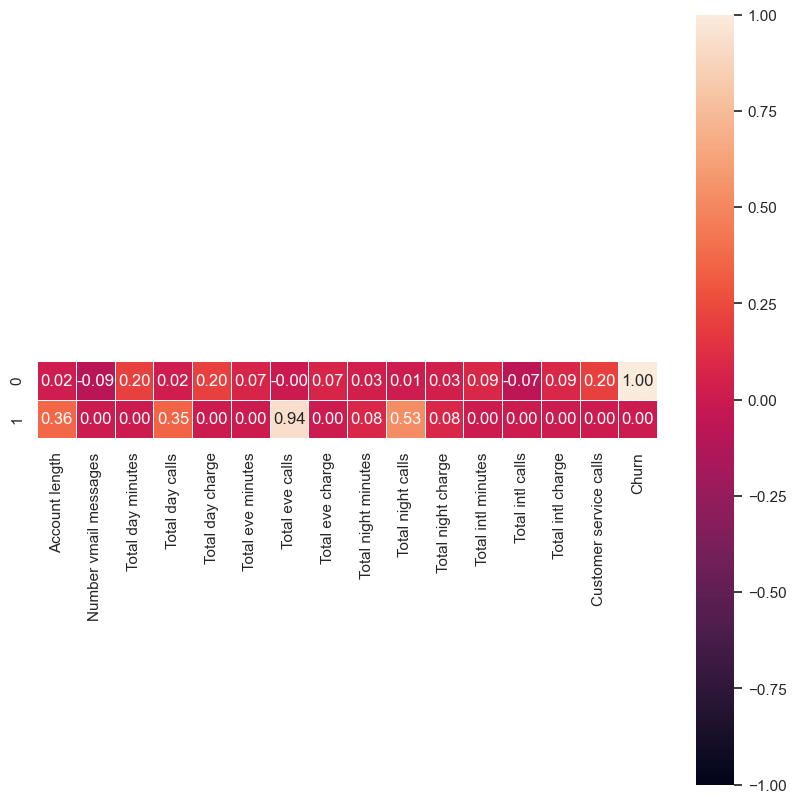

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(churn_num_corr, vmin = -1, vmax = 1, annot = True, fmt= '0.2f', square = True, linewidths= 0.5, ax=ax)

In [13]:
churn_num_corr_T = churn_num_corr.transpose()
churn_num_corr_T.sort_values(by=1,ascending=False)

,0,1
Total eve calls,-0.001539,9.366866e-01
Total night calls,0.012262,5.268301e-01
Account length,0.017728,3.601916e-01
Total day calls,0.018290,3.451563e-01
Total night charge,0.033635,8.249586e-02
Total night minutes,0.033639,8.246221e-02
Total intl calls,-0.069882,3.050806e-04
Total eve charge,0.072893,1.652419e-04
Total eve minutes,0.072906,1.647968e-04
Total intl minutes,0.086204,8.303771e-06


Highest corr for churn:

1) Total eve calls : 0.9366866
2) Total night calls : 0.5268301
3) Account length : 0.3601916

In [14]:
churn_cat_data_corr = churn_cat_data.phik_matrix()

In [15]:
print(churn_cat_data_corr)

                       State  Area code  International plan  Voice mail plan  \
State               1.000000   0.000000            0.048911         0.000000   
Area code           0.000000   1.000000            0.023845         0.000000   
International plan  0.048911   0.023845            1.000000         0.000000   
Voice mail plan     0.000000   0.000000            0.000000         1.000000   
Churn               0.128639   0.000000            0.418799         0.150517   

                       Churn  
State               0.128639  
Area code           0.000000  
International plan  0.418799  
Voice mail plan     0.150517  
Churn               1.000000  


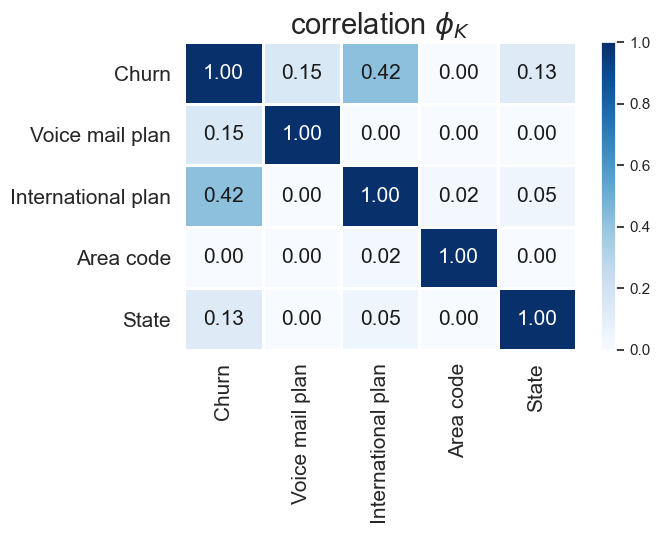

In [16]:
plot_correlation_matrix(churn_cat_data_corr.values, x_labels=churn_cat_data_corr.columns, y_labels=churn_cat_data_corr.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(7,5.5))
plt.tight_layout()

Highest Cat_data with correlation to churn:
1) International plan : 0.42
2) Voice mail plan : 0.15
3) State : 0.13

Model Evaluation

In [17]:
#One hot encoding to convert categorical variables into numerical

churn_cat = churndata.select_dtypes(include=[object]).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(churndata[churn_cat])
encoded_cat_df = pd.DataFrame(encoded_data,columns = encoder.get_feature_names_out(churn_cat))
churn_OHE = churndata
churn_OHE = churn_OHE.drop(churn_cat,axis = 1)
churn_OHE = pd.concat([churn_OHE, encoded_cat_df],axis = 1)
#print(f"Encoded data : \n{churndata}")
print(f"Encoded data : \n{churn_OHE}")

Encoded data : 
      Account length  Number vmail messages  Total day minutes  \
0                128                     25              265.1   
1                107                     26              161.6   
2                137                      0              243.4   
3                 84                      0              299.4   
4                 75                      0              166.7   
...              ...                    ...                ...   
2661              79                      0              134.7   
2662             192                     36              156.2   
2663              68                      0              231.1   
2664              28                      0              180.8   
2665              74                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0                 110             45.07              197.4               99   
1                 123            

Random Forest Model

In [18]:
Predictors = churn_OHE.drop(['Churn'],axis = 1)
Response = churn_OHE['Churn']

Predictors_train , Predictors_test, Response_train, Response_test = train_test_split(Predictors, Response, test_size = 0.2, random_state= 10)
smt = SMOTE(random_state= 10)
Predictors_train , Response_train = smt.fit_resample(Predictors_train,Response_train)

In [19]:
count = 0
for n in Response_train:
    if n == True:
        count+=1

print(count)

1830


Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter= 1000000) 
logreg.fit(Predictors_train,Response_train)
y_pred = logreg.predict(Predictors_test)

print(classification_report(y_true=Response_test,y_pred=y_pred))
accuracy = accuracy_score(Response_test,y_pred)
roc = roc_auc_score(Response_test,y_pred)
print("Accuracy : ", accuracy)
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.93      0.78      0.85       448
        True       0.37      0.67      0.48        86

    accuracy                           0.76       534
   macro avg       0.65      0.73      0.66       534
weighted avg       0.84      0.76      0.79       534

Accuracy :  0.7640449438202247
ROC : 0.7278343023255813


XG BOOST

c:\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:45:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

       False       0.95      0.99      0.97       448
        True       0.93      0.76      0.83        86

    accuracy                           0.95       534
   macro avg       0.94      0.87      0.90       534
weighted avg       0.95      0.95      0.95       534

Accuracy :  0.951310861423221
ROC : 0.872326619601329


c:\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:45:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

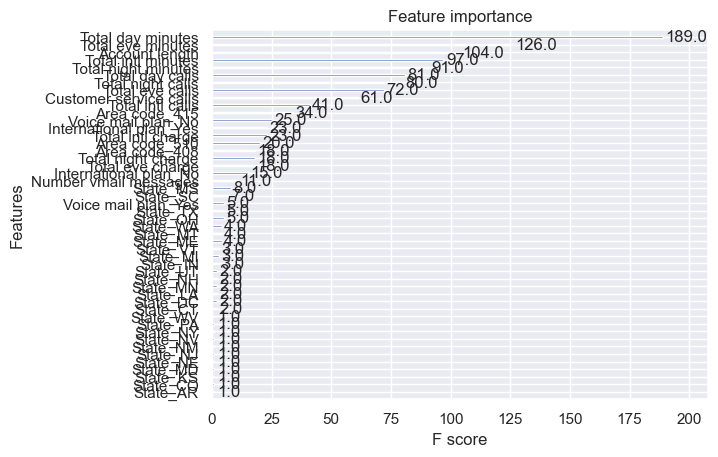

In [21]:
from xgboost import XGBClassifier
from xgboost import plot_importance
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, 
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0, 
                    max_depth = 7, min_child_weight=1, n_estimators=100, 
                    n_jobs=1, objective='binary:logistic', random_state=42, 
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, 
                    silent=True, subsample=1, enable_categorical=True)
xgb.fit(Predictors_train,Response_train)
y_pred = xgb.predict(Predictors_test)

print(classification_report(y_true=Response_test,y_pred=y_pred))
accuracy = accuracy_score(Response_test,y_pred)
roc = roc_auc_score(Response_test,y_pred)
print("Accuracy : ", accuracy)
print("ROC :", roc)
plot_importance(xgb.fit(Predictors_train, Response_train))

In [22]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(Predictors_train, Response_train)
y_pred = tree.predict(Predictors_test)

print(classification_report(y_true=Response_test,y_pred=y_pred))
accuracy = accuracy_score(Response_test,y_pred)
roc = roc_auc_score(Response_test,y_pred)
print("Accuracy : ", accuracy)
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.94      0.94      0.94       448
        True       0.69      0.71      0.70        86

    accuracy                           0.90       534
   macro avg       0.82      0.82      0.82       534
weighted avg       0.90      0.90      0.90       534

Accuracy :  0.9026217228464419
ROC : 0.8245172342192691


In [23]:
rf = RandomForestClassifier()
rf.fit(Predictors_train, Response_train)


RandomForestClassifier()

In [24]:
Response_predict = rf.predict(Predictors_test)
print(classification_report(y_true=Response_test,y_pred=Response_predict))
accuracy = accuracy_score(Response_test,Response_predict)
roc = roc_auc_score(Response_test,Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.92      0.98      0.95       448
        True       0.85      0.58      0.69        86

    accuracy                           0.92       534
   macro avg       0.89      0.78      0.82       534
weighted avg       0.91      0.92      0.91       534

Accuracy :  0.9157303370786517
ROC : 0.7806530315614619


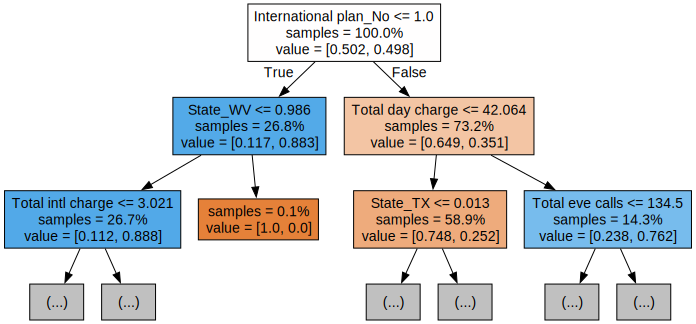

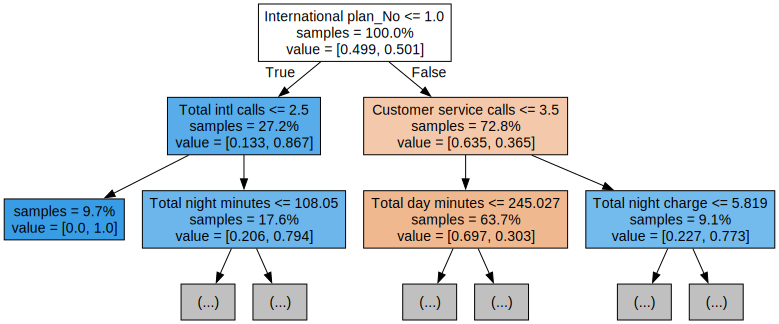

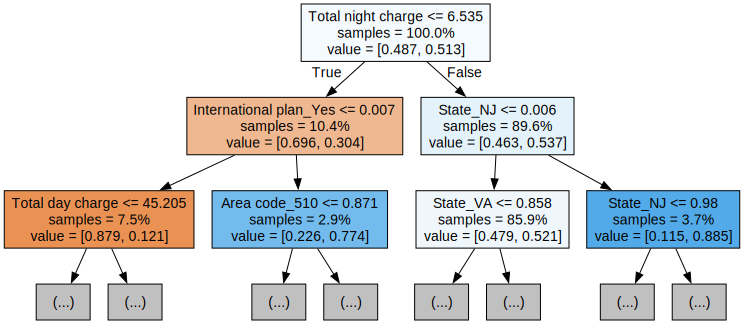

In [25]:
#sample of decision tress within random forest
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, 
                               feature_names = Predictors_train.columns,
                               filled = True,
                               max_depth = 2,
                               impurity = False,
                               proportion = True)
    graph = graphviz.Source(dot_data)
    display(graph)

Random Forest with Hyper Parameters

In [26]:
param_dist = {'n_estimators': randint(1,10000),
              'max_depth': randint(4,100)}

rand_search = RandomizedSearchCV(rf,param_distributions=param_dist,
                                 n_iter=10,cv=5, n_jobs=-1)

rand_search.fit(Predictors_train,Response_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000206B00D7680>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000206B011F0E0>})

In [27]:
best_rf = rand_search.best_estimator_
print("Best hyperparameters:", best_rf)

Best hyperparameters: RandomForestClassifier(max_depth=52, n_estimators=9998)


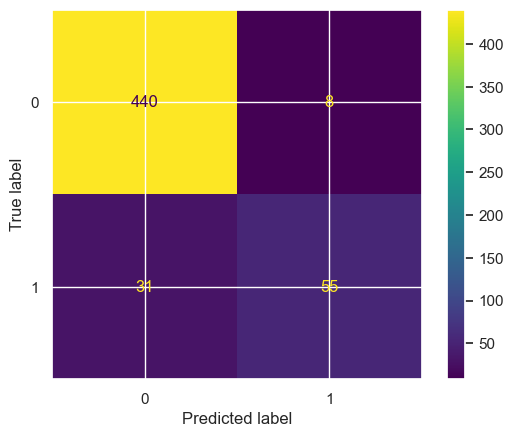

In [28]:
Response_predict = best_rf.predict(Predictors_test)
cm = confusion_matrix(Response_test, Response_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [29]:
print(classification_report(Response_test,Response_predict))
accuracy = accuracy_score(Response_test,Response_predict)
roc = roc_auc_score(Response_test,Response_predict)
print("Accuracy :", accuracy)
print("ROC :", roc)

              precision    recall  f1-score   support

       False       0.93      0.98      0.96       448
        True       0.87      0.64      0.74        86

    accuracy                           0.93       534
   macro avg       0.90      0.81      0.85       534
weighted avg       0.92      0.93      0.92       534

Accuracy : 0.9269662921348315
ROC : 0.8108388704318937


International plan_Yes    0.096284
International plan_No     0.094903
Total day charge          0.094595
Total day minutes         0.093754
Customer service calls    0.062229
                            ...   
State_TN                  0.000810
State_MO                  0.000723
State_GA                  0.000703
State_IA                  0.000691
State_RI                  0.000504
Length: 73, dtype: float64


<Axes: >

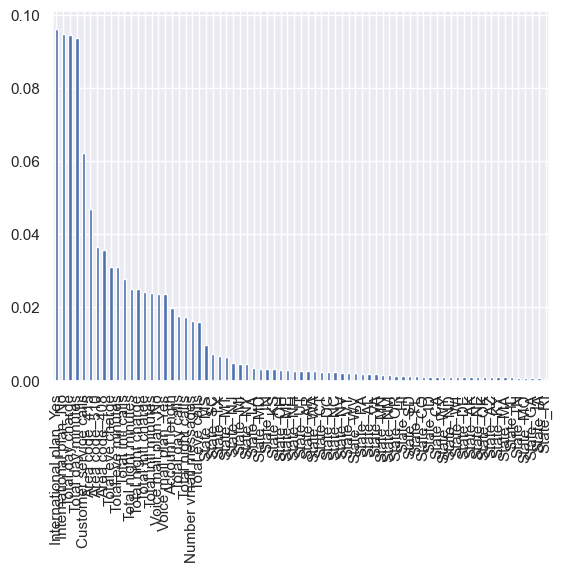

In [30]:
feature_importance = pd.Series(best_rf.feature_importances_,
                               index = Predictors_train.columns).sort_values(ascending=False)

print(feature_importance)
feature_importance.plot.bar()

LightGBM Model

In [31]:
lgmb = LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0,
                        learning_rate=0.1, max_depth=0, n_estimators=100,
                        num_leaves=50, objective='binary', silent=True)

In [32]:
lgmb.fit(Predictors_train,Response_train)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 1830, number of negative: 1830
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5491
[LightGBM] [Info] Number of data points in the train set: 3660, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=0, num_leaves=50, objective='binary', silent=True)

In [33]:
Response_predict = lgmb.predict(Predictors_test)
print(classification_report(Response_test,Response_predict))
accuracy = accuracy_score(Response_test,Response_predict)
roc = roc_auc_score(Response_test,Response_predict)
print("Accuracy :", accuracy)
print("ROC :", roc)

[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       448
        True       0.91      0.72      0.81        86

    accuracy                           0.94       534
   macro avg       0.93      0.85      0.89       534
weighted avg       0.94      0.94      0.94       534

Accuracy : 0.9438202247191011
ROC : 0.8537686877076412


In [34]:
churn_test_data = pd.read_csv('churn_test.csv')

In [35]:
churn_test_cat = churn_test_data.select_dtypes(include=[object]).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
encoded_test_data = encoder.fit_transform(churn_test_data[churn_test_cat])
encoded_test_cat_df = pd.DataFrame(encoded_test_data,columns = encoder.get_feature_names_out(churn_test_cat))
churn_test_OHE = churn_test_data
churn_test_OHE = churn_test_OHE.drop(churn_test_cat,axis = 1)
churn_test_OHE = pd.concat([churn_test_OHE, encoded_test_cat_df],axis = 1)
print(f"Encoded data : \n{churn_test_OHE}")

Encoded data : 
     Account length  Area code  Number vmail messages  Total day minutes  \
0               117        408                      0              184.5   
1                65        415                      0              129.1   
2               161        415                      0              332.9   
3               111        415                      0              110.4   
4                49        510                      0              119.3   
..              ...        ...                    ...                ...   
662             114        415                     26              137.1   
663             106        408                     29               83.6   
664              60        415                      0              193.9   
665             159        415                      0              169.8   
666             184        510                      0              213.8   

     Total day calls  Total day charge  Total eve minutes  Total eve ca

In [36]:
Response = churn_OHE['Churn']
Predictors = churn_OHE.drop(['Churn'],axis = 1)

              precision    recall  f1-score   support

       False       0.96      0.95      0.95      2278
        True       0.70      0.75      0.72       388

    accuracy                           0.92      2666
   macro avg       0.83      0.85      0.84      2666
weighted avg       0.92      0.92      0.92      2666

Accuracy :  0.9167291822955739
ROC : 0.8475636523266024


c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


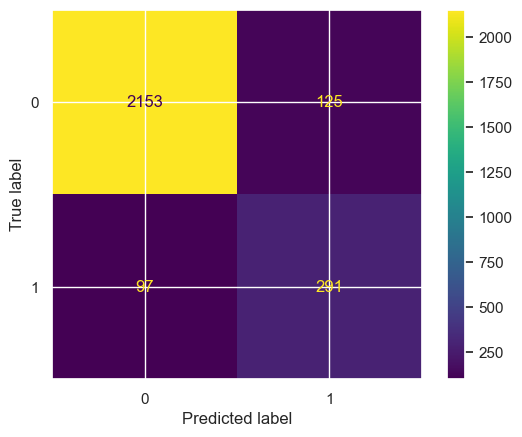

In [42]:
CT_Response_predict = tree.predict(Predictors)
print(classification_report(y_true=Response,y_pred=CT_Response_predict))
accuracy = accuracy_score(Response,CT_Response_predict)
roc = roc_auc_score(Response,CT_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,CT_Response_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2278
        True       0.98      0.91      0.94       388

    accuracy                           0.98      2666
   macro avg       0.98      0.95      0.97      2666
weighted avg       0.98      0.98      0.98      2666

Accuracy :  0.9831207801950488
ROC : 0.9516328303901956


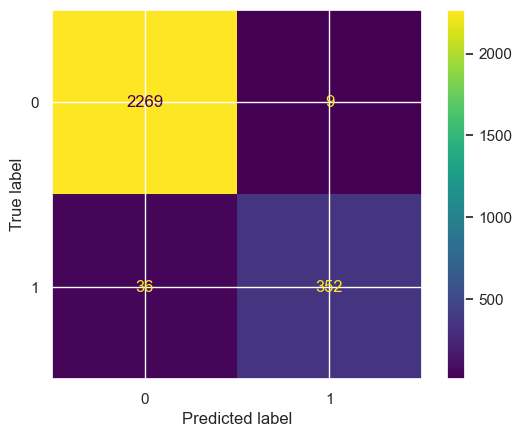

In [37]:
RF_Response_predict = rf.predict(Predictors)
print(classification_report(y_true=Response,y_pred=RF_Response_predict))
accuracy = accuracy_score(Response,RF_Response_predict)
roc = roc_auc_score(Response,RF_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,RF_Response_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2278
        True       0.98      0.92      0.95       388

    accuracy                           0.99      2666
   macro avg       0.98      0.96      0.97      2666
weighted avg       0.99      0.99      0.99      2666

Accuracy :  0.9853713428357089
ROC : 0.9582956201406551


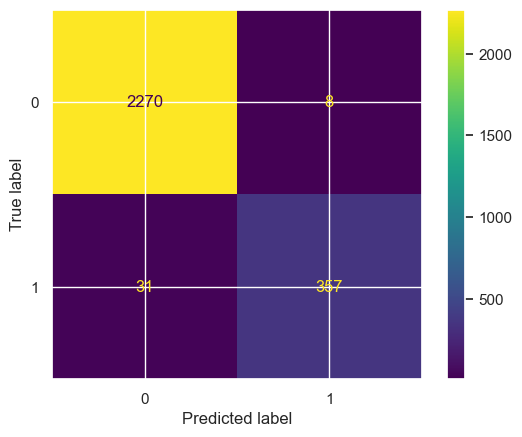

In [38]:
RFH_Response_predict = best_rf.predict(Predictors)
print(classification_report(y_true=Response,y_pred=RFH_Response_predict))
accuracy = accuracy_score(Response,RFH_Response_predict)
roc = roc_auc_score(Response,RFH_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,RFH_Response_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2278
        True       0.98      0.94      0.96       388

    accuracy                           0.99      2666
   macro avg       0.99      0.97      0.98      2666
weighted avg       0.99      0.99      0.99      2666

Accuracy :  0.9887471867966992
ROC : 0.9677552202601305


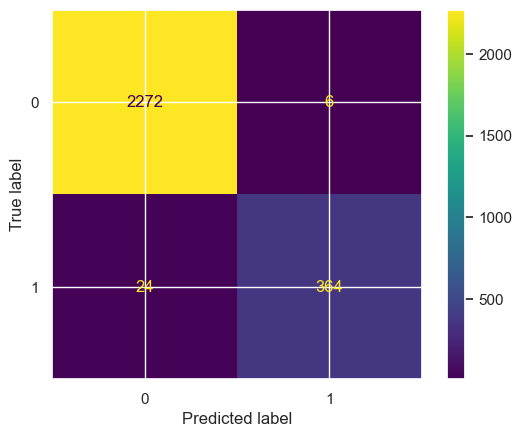

In [39]:
lgmb_Response_predict = lgmb.predict(Predictors)
print(classification_report(y_true=Response,y_pred=lgmb_Response_predict))
accuracy = accuracy_score(Response,lgmb_Response_predict)
roc = roc_auc_score(Response,lgmb_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,lgmb_Response_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2278
        True       0.99      0.95      0.97       388

    accuracy                           0.99      2666
   macro avg       0.99      0.97      0.98      2666
weighted avg       0.99      0.99      0.99      2666

Accuracy :  0.9902475618904726
ROC : 0.971840690422961


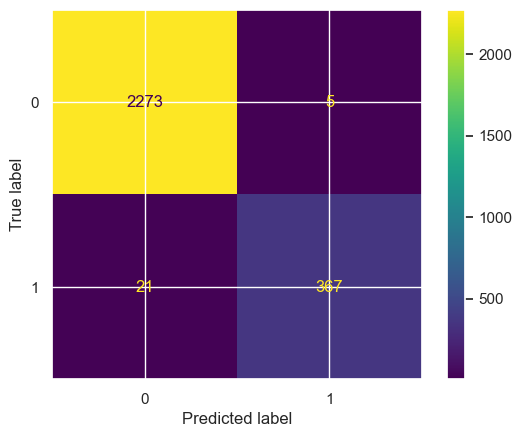

In [40]:
XG_Response_predict = xgb.predict(Predictors)
print(classification_report(y_true=Response,y_pred=XG_Response_predict))
accuracy = accuracy_score(Response,XG_Response_predict)
roc = roc_auc_score(Response,XG_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,XG_Response_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

              precision    recall  f1-score   support

       False       0.95      0.79      0.86      2278
        True       0.38      0.73      0.50       388

    accuracy                           0.78      2666
   macro avg       0.66      0.76      0.68      2666
weighted avg       0.86      0.78      0.81      2666

Accuracy :  0.7843210802700675
ROC : 0.7636683924223636


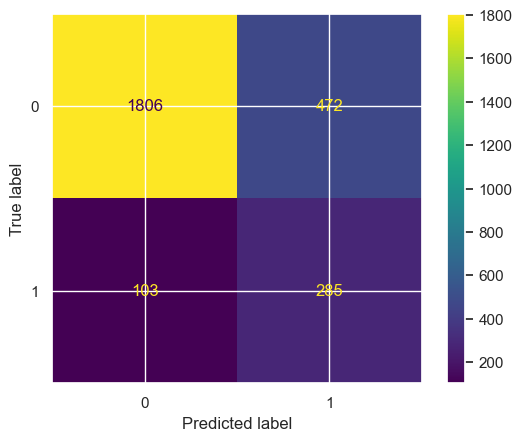

In [41]:
LR_Response_predict = logreg.predict(Predictors)
print(classification_report(y_true=Response,y_pred=LR_Response_predict))
accuracy = accuracy_score(Response,LR_Response_predict)
roc = roc_auc_score(Response,LR_Response_predict)
print("Accuracy : ", accuracy)
print("ROC :", roc)
cm = confusion_matrix(Response,LR_Response_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

Model Ranking:

1) XGBOOST
2) Light GBM
3) Random Forest with Hyper Perimeter
4) Random Forest
5) Classification Tree
6) Logistic Regression